In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
train = pd.read_csv('/home/aastha/Downloads/titanictrain.csv')
test = pd.read_csv('/home/aastha/Downloads/titanictest.csv')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics


In [3]:
train.head()
train.shape
#Parch means total count of parentchild
#sibsp means total count of siblingspouse

(891, 12)

In [4]:
#Problem Statement: Based on the data (features given) we have to predict whether the passenger has survived or not.
#Now, We'll be doing Explantory Data Analysis for that  we will check how many null values are there.
train.isnull().mean()
# Basically Cabin > Age > Embarked are the only columns that have null values.


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

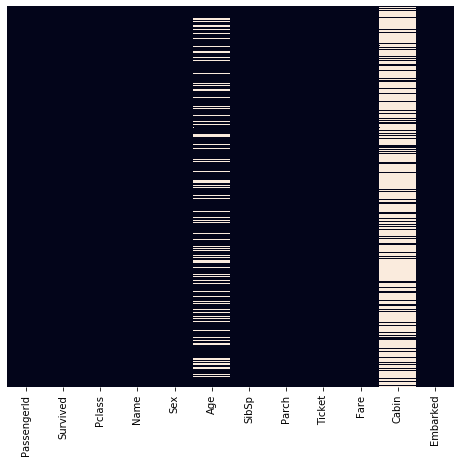

In [5]:
#if the value is true then it is null value.but on the other hand it becomes difficult to see these values in a large dataset
#another problem is that it is not showing values for all the rows so its better to visualize it.
plt.figure(figsize=(8,7))
sns.heatmap(train.isnull(),yticklabels=False,cbar = False)
#We have not shown the gradient bar i.e the cbar because here we are not checking on the intensity.
#also we don't need row numbers so we have put yticklabels = false

In [6]:
#Interpretation: 1. The color lines shows the null values. 2. Most of the null values are in age column and cabin column and a few in embarked column.

In [7]:
train['Age'].isnull().sum()
c = (train['Age'].isnull().sum()/891)*100
print(c)
#So we see that almost 20% of the age data is missing.So, so me form of imputation can be applied.

19.865319865319865


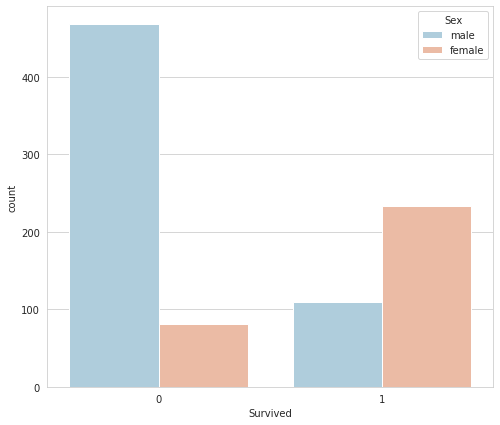

In [8]:
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable
sns.set_style('whitegrid')
plt.figure(figsize=(8,7))
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

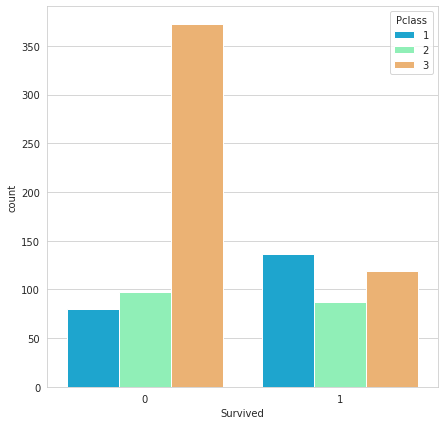

In [9]:
#Checking the count of the passengers according to their CLass
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [10]:
#Since the percentage of missing values of age is less so we can drop the null values.
#https://seaborn.pydata.org/generated/seaborn.distplot.html
#sns.distplot(train['Age'].dropna(),kde=False,color='darkblue',bins=40)
#here we are trying to see the distributio of age so that we can see the average age of the people. Also, on observation this plot looks like a normal distribution.
#kde = false because I don't want to see the probability distribution.

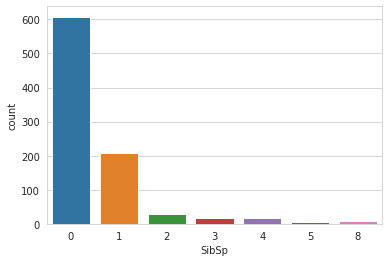

In [11]:
sns.countplot(x='SibSp',data=train)

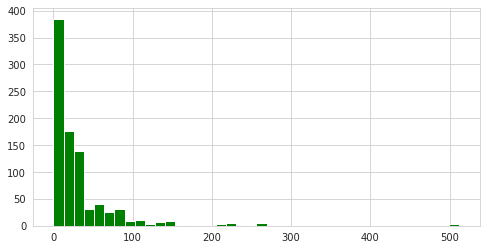

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [13]:
train['Age']= train['Age'].fillna(train['Age'].median())
test['Age']= test['Age'].fillna(test['Age'].median())

In [14]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
#Converting Categorical Features
#We'll need to convert categorical features to dummy variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
sex_train = pd.get_dummies(train['Sex'],drop_first=True)
embark_train = pd.get_dummies(train['Embarked'])
sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'])

In [19]:
#Dropping the columns with categorical data and adding the changed ones.
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
train = pd.concat([train,sex_train,embark_train],axis=1)
test = pd.concat([test,sex_test,embark_test],axis = 1)

In [21]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,892,3,34.5,0,0,7.8292,1,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,1,0
3,895,3,27.0,0,0,8.6625,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,0,1


In [22]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
Y_train = train['Survived']
X_train = train.drop('Survived',axis=1)
X_train.isnull().mean()

PassengerId    0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
male           0.0
C              0.0
Q              0.0
S              0.0
dtype: float64

In [24]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
test.isnull().mean()


PassengerId    0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
male           0.0
C              0.0
Q              0.0
S              0.0
dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(test)
predictions

/home/aastha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
len(ids)
len(predictions)


#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)